# Test Chi2 como prueba de independencia de variables. 

El objetivo es saber si existe una relación entre la predictora y el target mas alla de lo que razonablemente podría producir el azar.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import random
from scipy.stats import chi2_contingency

In [22]:
df = pd.read_csv("../datasets/titanic.csv")
df = df[["Sex", "Survived"]]
df_observed = pd.crosstab(df['Survived'], df['Sex'])

In [23]:
chi2, p, dof, expected = chi2_contingency(df_observed)
# Convertir los resultados esperados a un DataFrame
df_expected = pd.DataFrame(expected, index=df_observed.index, columns=df_observed.columns)


In [24]:
df_expected

Sex,female,male
Survived,,
0,193.474747,355.525253
1,120.525253,221.474747


In [25]:
print("Tabla Observada:")
print(df_observed)
print("\nTabla Esperada:")
print(df_expected)
print(f"\nValor chi-cuadrado: {chi2}")
print(f"p-valor: {p}")

Tabla Observada:
Sex       female  male
Survived              
0             81   468
1            233   109

Tabla Esperada:
Sex           female        male
Survived                        
0         193.474747  355.525253
1         120.525253  221.474747

Valor chi-cuadrado: 260.71702016732104
p-valor: 1.1973570627755645e-58


Nota: Se calculó manualmente como comprobación, número ronda los 261 aproximadamente, se comprueba el resultado entregado por scipy.stats. 

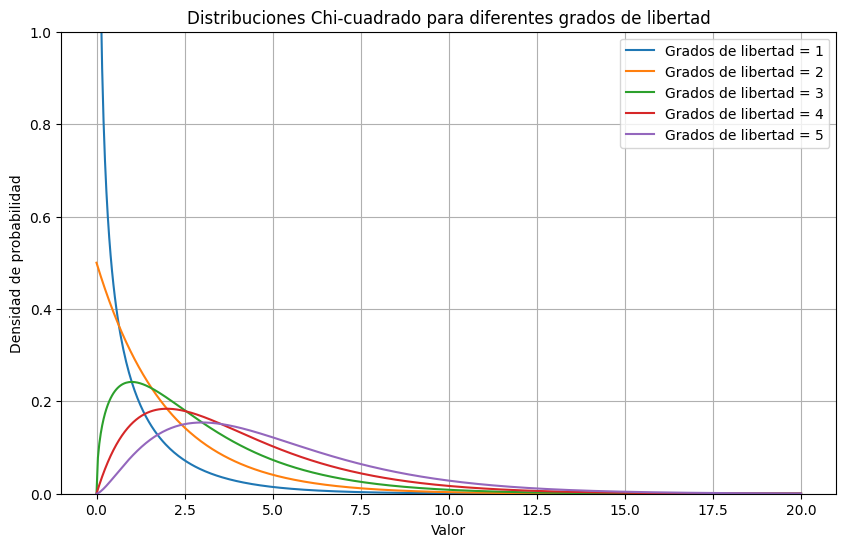

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Configuración de grados de libertad
df_values = [1, 2, 3, 4, 5]
x = np.linspace(0, 20, 500)  # Rango de valores x

# Crear la figura
plt.figure(figsize=(10, 6))

# Dibujar la distribución chi-cuadrado para cada grado de libertad
for df in df_values:
    plt.plot(x, chi2.pdf(x, df), label=f"Grados de libertad = {df}")

# Personalización del gráfico
plt.title("Distribuciones Chi-cuadrado para diferentes grados de libertad")

plt.xlabel("Valor")
plt.ylim(0, 1)  # Limitar el eje y a un máximo de 1
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


¿Se pueden obtener resultados similares via remuestreo? Esta alternativa, disponible por la disponibilidad de computadoras puede independizarnos de los supuestos asociados a los test paramétricos.

## Chi-Square Test
### Chi-Square Test: enfoque via resampleo

In [27]:
def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        pearson_residuals.append([(observe - expect) ** 2 / expect
                                  for observe in row])
    # return sum of squares
    return np.sum(pearson_residuals)

In [32]:
df = pd.read_csv("../datasets/titanic.csv")
df = df[["Sex", "Survived"]]
df_observed = pd.crosstab(df['Survived'], df['Sex'])

In [33]:
df_observed

Sex,female,male
Survived,,
0,81,468
1,233,109


In [34]:
df

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [36]:
survived_count =df[df["Survived"]==1].shape[0]
died_count = df[df["Survived"]==0].shape[0] 
female_sample_size = df[df["Sex"]=="female"].shape[0] 
male_sample_size   = df[df["Sex"]=="male"].shape[0]


In [46]:
diff = df[(df["Survived"]==1) & (df["Sex"]=="female")].shape[0]-df[(df["Survived"]==1) & (df["Sex"]=="male")].shape[0]

In [47]:
# Resampling approach
# una caja con la totalidad de sobrevivientes
box = [1] * survived_count
# agrego a la caja los fallecidos
box.extend([0] * died_count)



In [55]:
diffs = []
for i in range(1000):
    random.shuffle(box)
    s1 = box[0:female_sample_size]
    s2 = box[female_sample_size:]
    ts1 = sum(s1)
    ts2 = sum(s2)
    diffs.append(ts2-ts1)



TypeError: 'NoneType' object is not subscriptable

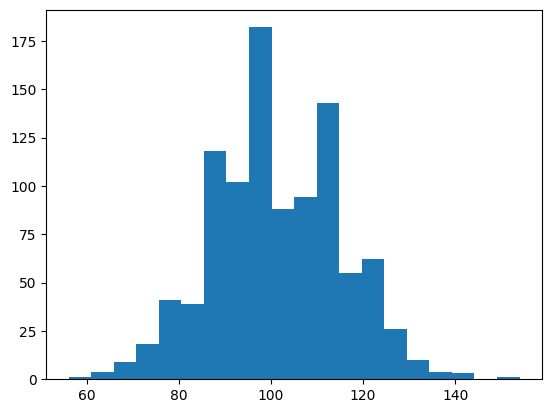

In [54]:
plt.hist(diffs, bins=20) 
plt.show()   

In [ ]:
classes             = 2
expected_survived   = survived_count / classes    
   
male_sample_size    
expected_dieds = 1000 - expected_survived


expected = [expected_clicks, expected_noclicks]
chi2observed = chi2(clicks.values, expected)

def perm_fun(box):
    random.shuffle(box)
    sample_clicks = [sum(box[0:1000]),
                     sum(box[1000:2000]),
                     sum(box[2000:3000])]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for _ in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

# Ejercicio: desarrollar un test estadistico para rechazar o aceptar la hipotesis nula de independencia de variables para Pclass vs survived